# Importações e leitura do Data Frame

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


# Localizando filmes produzidos pelo Brasil ou que o Brasil participou

In [35]:
df[df['country'].str.contains('Brazil', na=False)].head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
208,s209,Movie,A new Capitalism,NaN,NaN,Brazil,"June 12, 2018",2017,TV-14,76 min,"Documentaries, International Movies",Entrepreneurs worldwide explore alternatives t...
218,s219,TV Show,A Queen Is Born,Carla Barros,"Gloria Groove, Alexia Twister",Brazil,"November 11, 2020",2020,TV-14,1 Season,"International TV Shows, Reality TV",Gloria Groove and Alexia Twister make drag dre...
230,s231,Movie,A Sort of Family,Diego Lerman,"Bárbara Lennie, Daniel Aráoz, Claudio Tolcachi...","Argentina, Brazil, France, Poland, Germany, De...","April 1, 2018",2017,TV-14,96 min,"Dramas, International Movies, Thrillers",An Argentine doctor faces legal and ethical ch...
320,s321,Movie,Afonso Padilha: Classless,"Junior Carelli, Rudge Campos",Afonso Padilha,Brazil,"September 3, 2020",2020,TV-MA,63 min,Stand-Up Comedy,Brazilian comedian Afonso Padilha dives into h...


# Visualizando os 5 maiores produtores de filmes

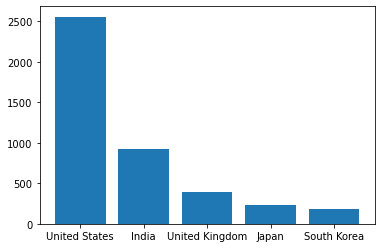

In [36]:
top_five = pd.DataFrame(df.country.value_counts().head()).reset_index().rename(columns={'index':'country', 'country':'movies'})

plt.bar(top_five.country, top_five.movies)

plt.show()

# Visualizando os tipos de conteúdo mais presentes

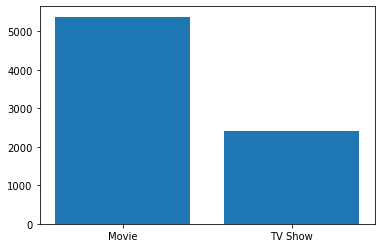

In [37]:
tipos = pd.DataFrame(df.type.value_counts().reset_index().rename(columns={'index': 'type', 'type': 'number'}))

plt.bar(tipos.type, tipos.number)

plt.show()

# Selecionando apenas os filmes para descobrir qual tem maior duração #

In [38]:
movies = df.loc[df['type'] == 'Movie']
movies

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ..."
...,...,...,...,...,...,...,...,...,...,...,...,...
7781,s7782,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."


# Separando a parte inteira da duração dos filmes #

In [43]:
movie_duration = movies.duration.apply(lambda x: int(x.split(' ')[0]))
movie_duration.head()

1     93
2     78
3     80
4    123
6     95
Name: duration, dtype: int64

# Encontrando o filme com a maior duração #

In [40]:
movies.loc[movies.duration.apply(lambda x: int(x.split(' ')[0])) == movie_duration.max()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
957,s958,Movie,Black Mirror: Bandersnatch,NaN,"Fionn Whitehead, Will Poulter, Craig Parkinson...",United States,"December 28, 2018",2018,TV-MA,312 min,"Dramas, International Movies, Sci-Fi & Fantasy","In 1984, a young programmer begins to question..."


# Visualização dos diretores com mais filmes na plataforma

                 director  number
0  Raúl Campos, Jan Suter      18
1            Marcus Raboy      15
2               Jay Karas      14
3     Cathy Garcia-Molina      13
4         Youssef Chahine      12


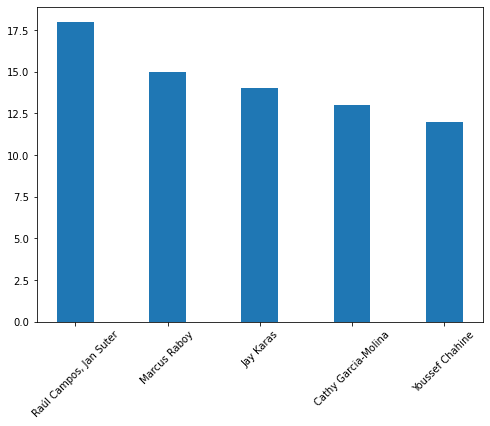

In [41]:
top_five_d = pd.DataFrame(movies.director.value_counts()).reset_index().rename(columns={'index':'director', 
                                                                                        'director':'number'}).head()
print(top_five_d)
x = np.arange(len(top_five_d.head()))

fig, ax = plt.subplots(figsize=[8.0, 5.8])
directors = ax.bar(x, width=0.4, height=top_five_d.number)
ax.set_xticks(x)
ax.set_xticklabels(top_five_d.director, rotation=45)

plt.show()

# Visualizando a censura para filmes e séries #

       index  rating_tv  rating_m
0      TV-MA     1018.0      1845
1      TV-14      659.0      1272
2      TV-PG      301.0       505
3      TV-Y7      176.0        95
4       TV-Y      163.0       117
5       TV-G       83.0       111
6         NR        5.0        79
7    Unknown        2.0         5
8          R        2.0       663
9   TV-Y7-FV        1.0         5
10     PG-13        0.0       386
11        PG        0.0       247
12         G        0.0        39
13        UR        0.0         5
14     NC-17        0.0         3


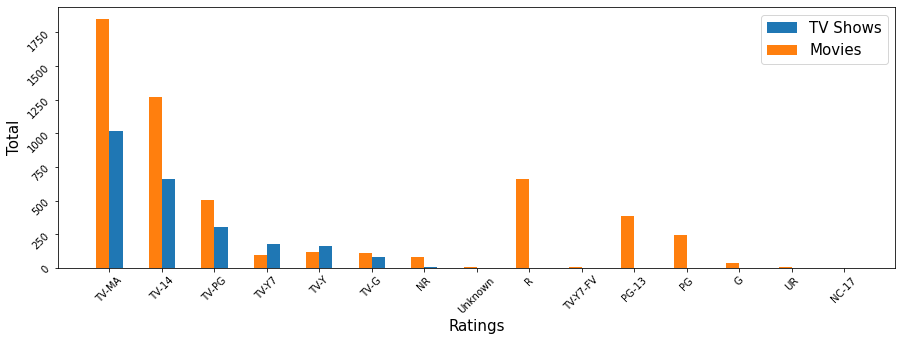

In [42]:
tv = df.loc[df.type == 'TV Show']

tvs = tv.rating.replace(np.nan, 'Unknown').value_counts().reset_index().rename(columns={'rating':'rating_tv'})
moviess = movies.rating.replace(np.nan, 'Unknown').value_counts().reset_index().rename(columns={'rating':'rating_m'})


junto = tvs.merge(moviess, how='outer', on='index').fillna(0)
print(junto)


labels = junto['index']
# print(labels)

local = np.arange(len(labels))  # the label locations
width = 0.25 # the width of the bars

fig, ax = plt.subplots(figsize=(15.0, 4.8))
rtv = ax.bar(x=(local + width/2), height=junto.rating_tv,  align='center', width=width, label='TV Shows')
rmovie = ax.bar(x=(local - width/2), height=junto.rating_m,  align='center', width=width, label='Movies')

ax.set_xticks(local)
ax.set_xticklabels(labels)
ax.tick_params(labelrotation=45)
ax.legend(fontsize=15)
ax.set_xlabel('Ratings', fontsize=15)
ax.set_ylabel('Total', fontsize=15)

plt.show()